# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

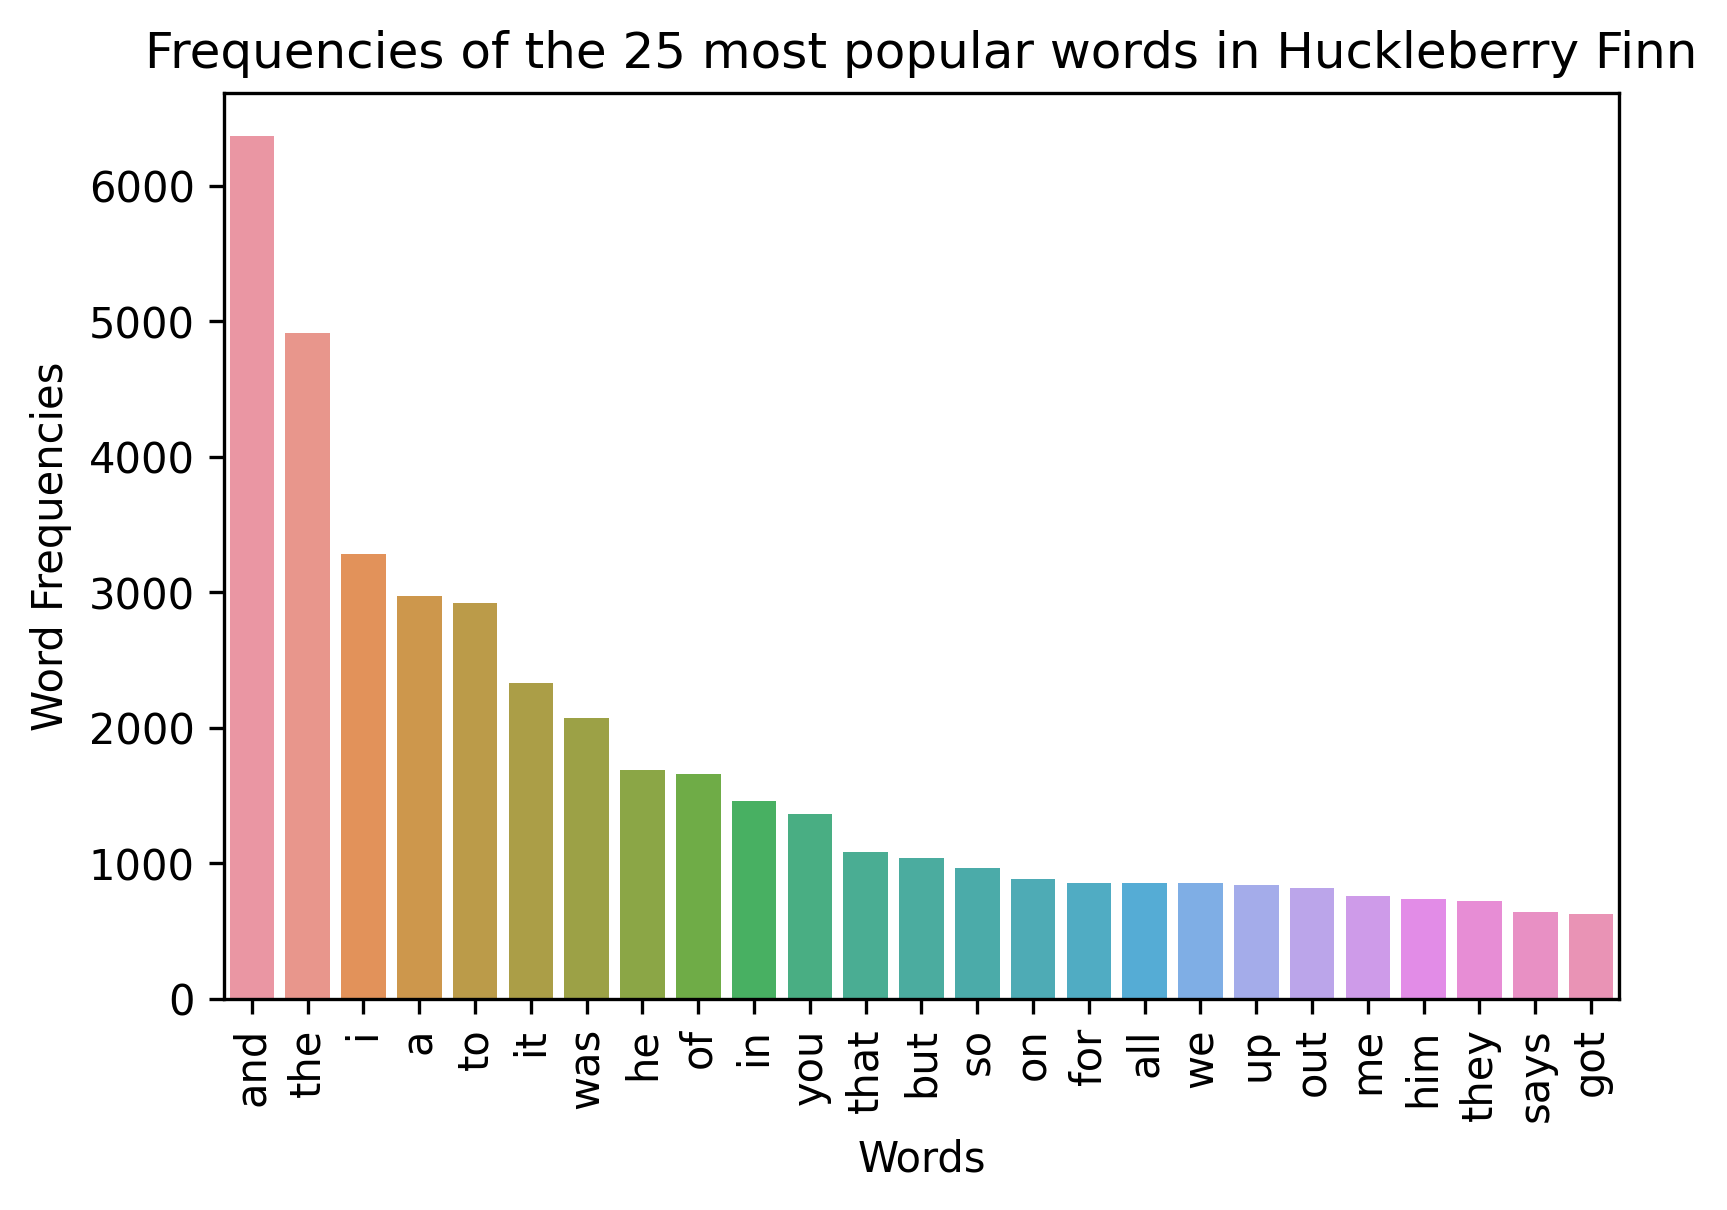

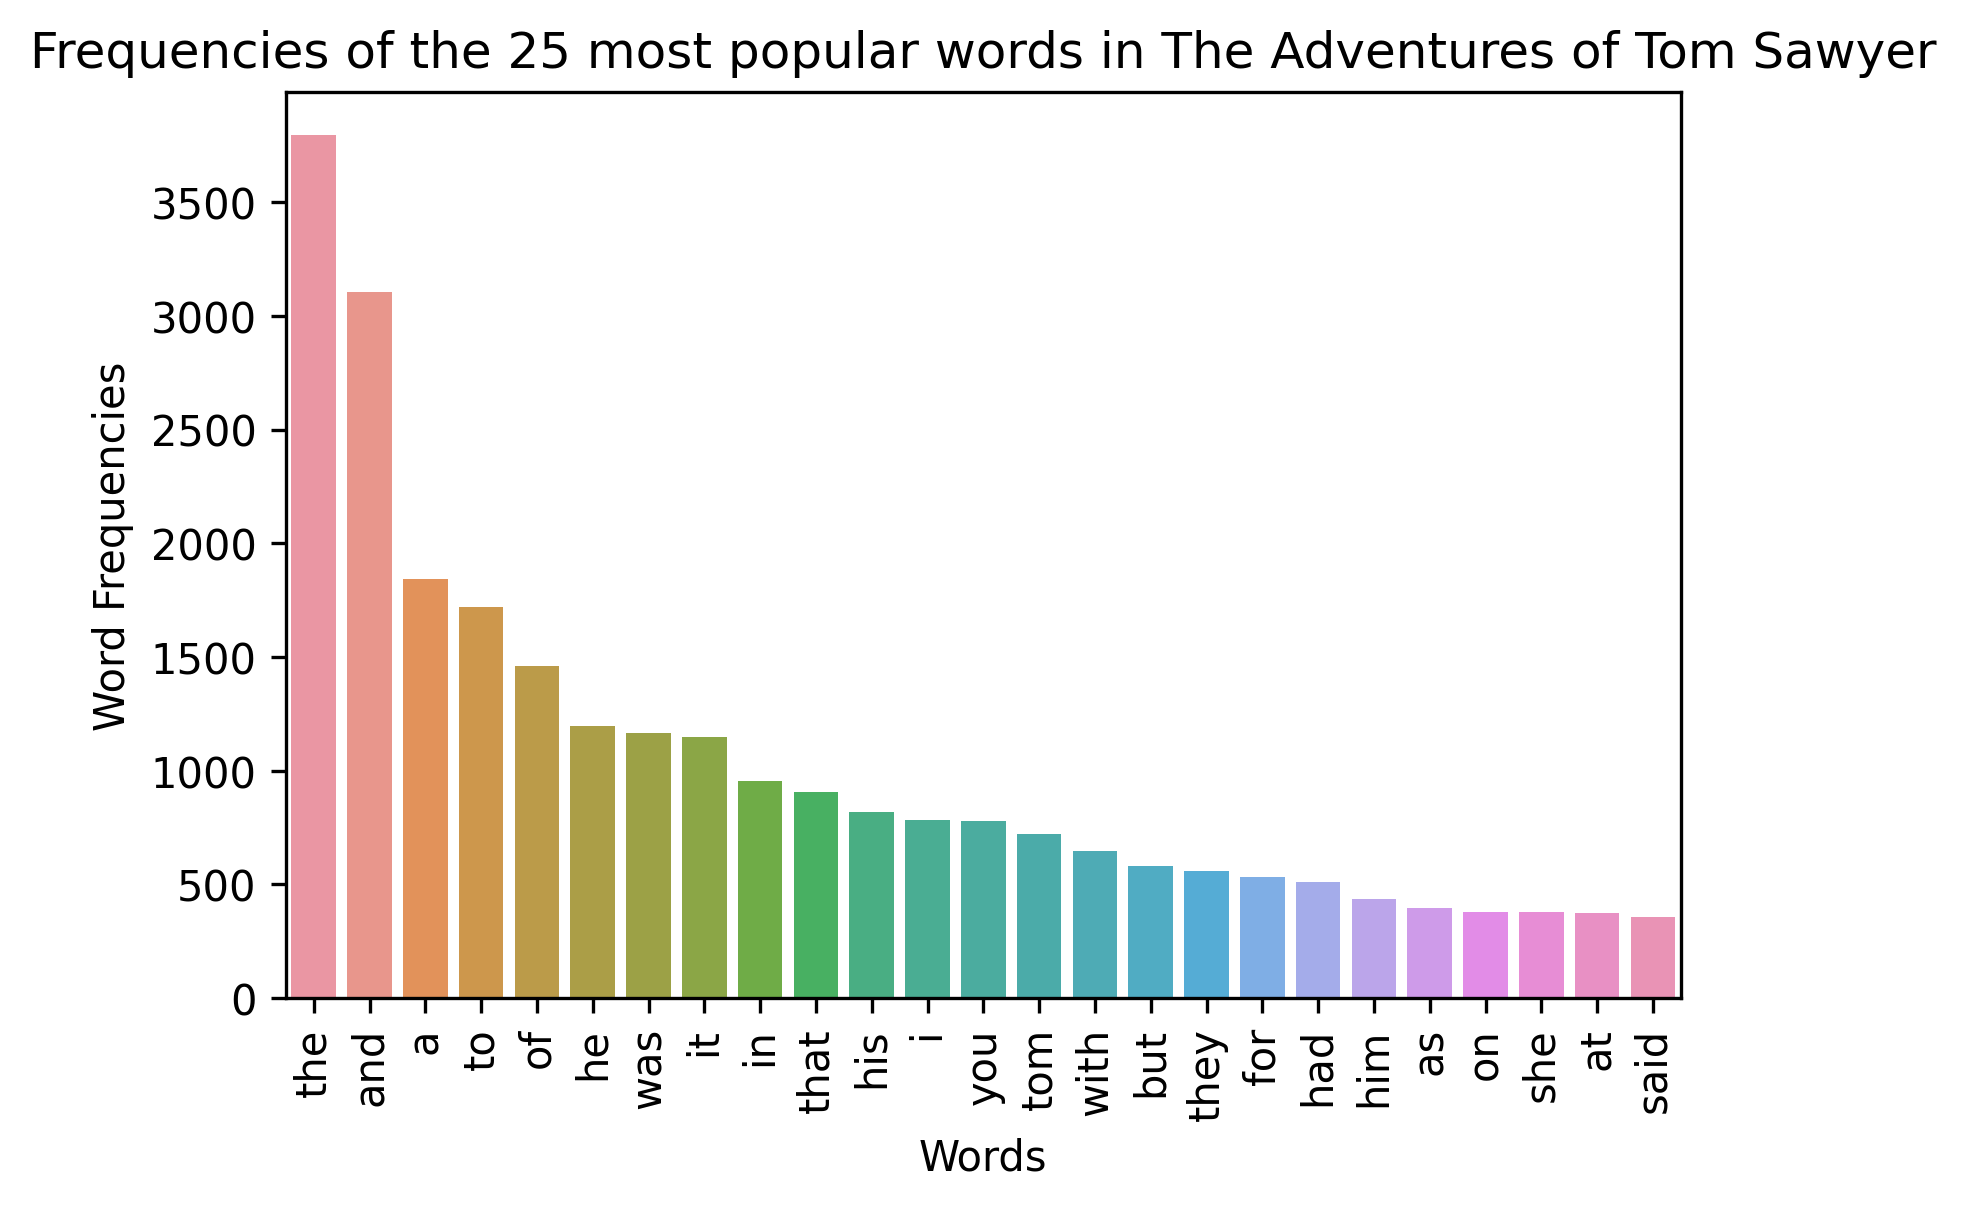

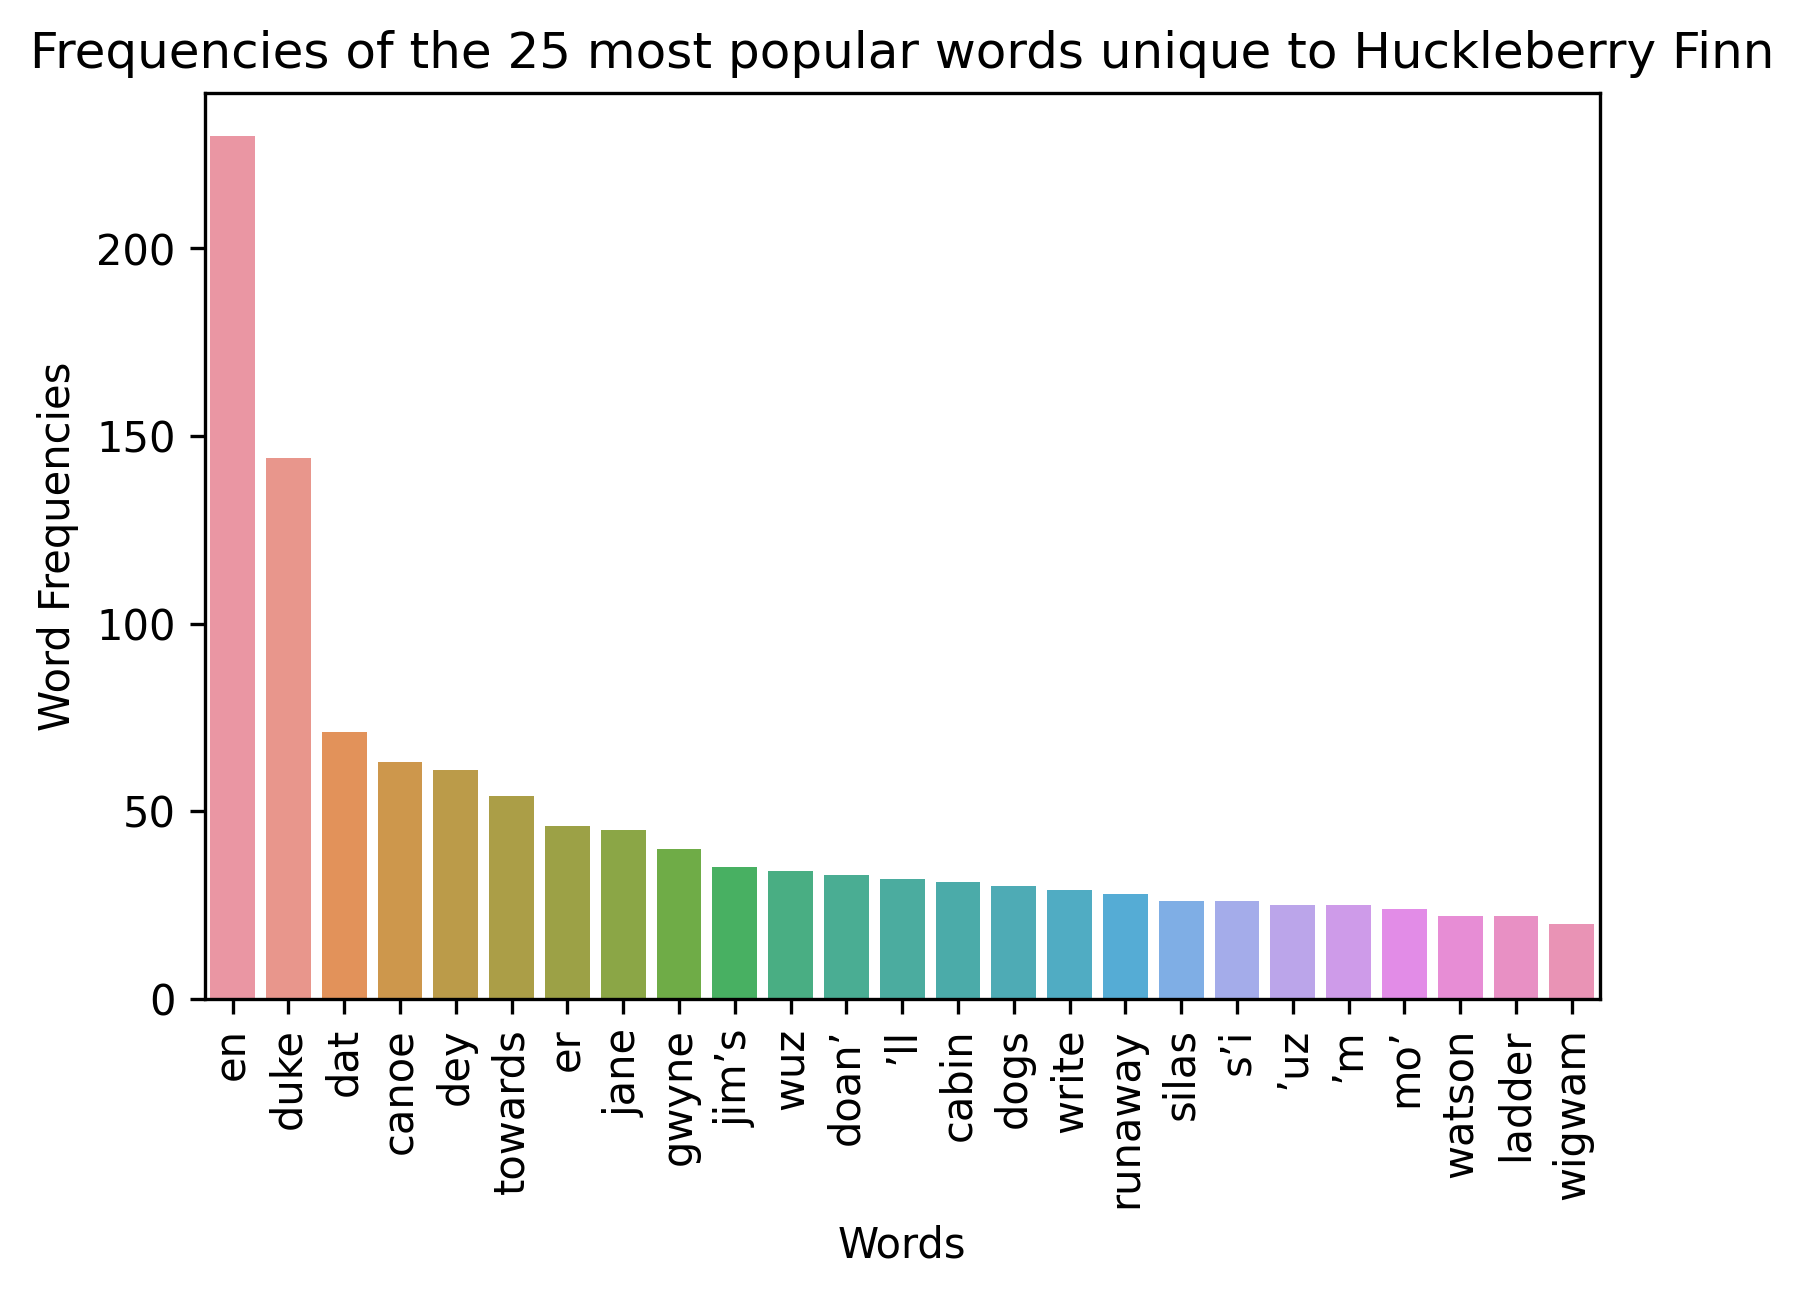

In [7]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_book(bookdicts, booktuple, stopwords, stopchars):
    
    url = booktuple[1]
    booktitle = booktuple[0].replace('\n','')
    bookdict = {}

    # Load in our URL
    page = requests.get(url)

    # Parse our current page using beautifulsoup
    soup = BeautifulSoup(page.content, 'html.parser') 
    item = None

    # Set our start and end divs
    start = soup.find('div',text='*** START OF THE PROJECT GUTENBERG EBOOK %s ***'%booktitle.upper())
    end = soup.find('div',text='*** END OF THE PROJECT GUTENBERG EBOOK %s ***'%booktitle.upper())
    item = start.nextSibling

    # Read through all the paragraphs
    while item != end:

        # Extract the tag in the current paragraph
        line = item.get_text()

        # Convert all to lowercase
        line = line.lower()

        # Remove unwanted characters
        rx = '[' + re.escape(''.join(stopchars)) + ']'
        line = re.sub(rx,'', line)
        # Strip all numbers
        line = re.sub('^[0-9\.]*$','',line)
        # Convert long dashes and spaces into normal spaces
        line = re.sub(r'—|\s+',' ',line)

        # Break each line into their words
        words = line.split()

        # Loop through our words
        for word in words:

            # If a number somehow escaped our regex, skip it
            if word.isnumeric():
                continue

            # If this word shouldn't be in our word list, skip it
            if word in stopwords:
                continue

            # Append the word to our local (book-specific) dictionairy
            if word in bookdict:
                bookdict[word] += 1
            else:
                bookdict[word] = 1

        # Move on to the next tag within our html
        item = item.nextSibling

    # Append our local dictionairy to our list of dictionairies        
    bookdicts[booktitle] = bookdict

if __name__ == "__main__":
    
    
    # Set our image DPI
    plt.rcParams['figure.dpi'] = 300

    # Create an array to hold our book dictionaries
    bookdicts = {}

    # Create a list of the characters we want to strip
    stopchars = [',','"','.','&','|',':','@','<','>','(',')','*','$','?','!','\\','/',';','=','”','“','‘','[',']']

    # Create a list of words we want to strip
    stopwords = ['ut','\'re','.',',','--','\'s','cf','?',')','(',':','\'','\"','-','}','â','£','{','&','|',u'\u2014','',']']
    
    # Create variables that hold our books and their respective links
    books = [("Huckleberry Finn", "https://www.gutenberg.org/files/76/76-h/76-h.htm"), ("The Adventures of Tom Sawyer", "https://www.gutenberg.org/files/74/74-h/74-h.htm"),("The Adventures of Sherlock Holmes", "https://www.gutenberg.org/files/1661/1661-h/1661-h.htm")]

    # Process our project gutenberg books
    process_book(bookdicts, books[0], stopwords, stopchars)
    process_book(bookdicts, books[1], stopwords, stopchars)
    process_book(bookdicts, books[2], stopwords, stopchars)
    
    # Sort the book dictionairies for each  book
    for book in bookdicts:
        bookdicts[book] = dict(sorted(bookdicts[book].items(), key=lambda item: item[1], reverse=True))
    
    # Create a dataframe with our first book and plot it
    olddict = bookdicts[books[0][0]]
    df = pd.DataFrame({
        "Words": list(olddict.keys())[:25],
        "Word Frequencies": list(olddict.values())[:25],
    })
    plt.xticks(rotation = 90)
    plt.title("Frequencies of the 25 most popular words in {}".format(books[0][0]))
    sns.barplot(data=df,x="Words",y="Word Frequencies")
    plt.show()
    
    # Create a dataframe with our second book and plot it
    plt.clf()
    olddict = bookdicts[books[1][0]]
    df = pd.DataFrame({
        "Words": list(olddict.keys())[:25],
        "Word Frequencies": list(olddict.values())[:25],
    })
    plt.xticks(rotation = 90)
    plt.title("Frequencies of the 25 most popular words in {}".format(books[1][0]))
    sns.barplot(data=df,x="Words",y="Word Frequencies")
    plt.show()
    
    # Go through and create a dictionairy of words unique to Huckleberry Finn
    uniquewords = {}
    for word in bookdicts[books[0][0]]:
        if word not in bookdicts[books[1][0]]:
            uniquewords[word] = bookdicts[books[0][0]][word]
            
    # Create a dataframe with our second book and plot it
    plt.clf()
    df = pd.DataFrame({
        "Words": list(uniquewords.keys())[:25],
        "Word Frequencies": list(uniquewords.values())[:25],
    })
    plt.xticks(rotation = 90)
    plt.title("Frequencies of the 25 most popular words unique to {}".format(books[0][0]))
    sns.barplot(data=df,x="Words",y="Word Frequencies")
    plt.show()

1. As we can see in the above barplots, the top 25 words in books by Mark Twain are fairly similar. However, we see some interesting patterns emerge. The words "the" and "and" swap in popularity between Huckleberry Finn and The Adventures of Tom Sawyer. Furthermore, we can see most of the unique lingo that is exclusive to Huckleberry Finn includes names, like "Watson", "Jane" and "Duke".

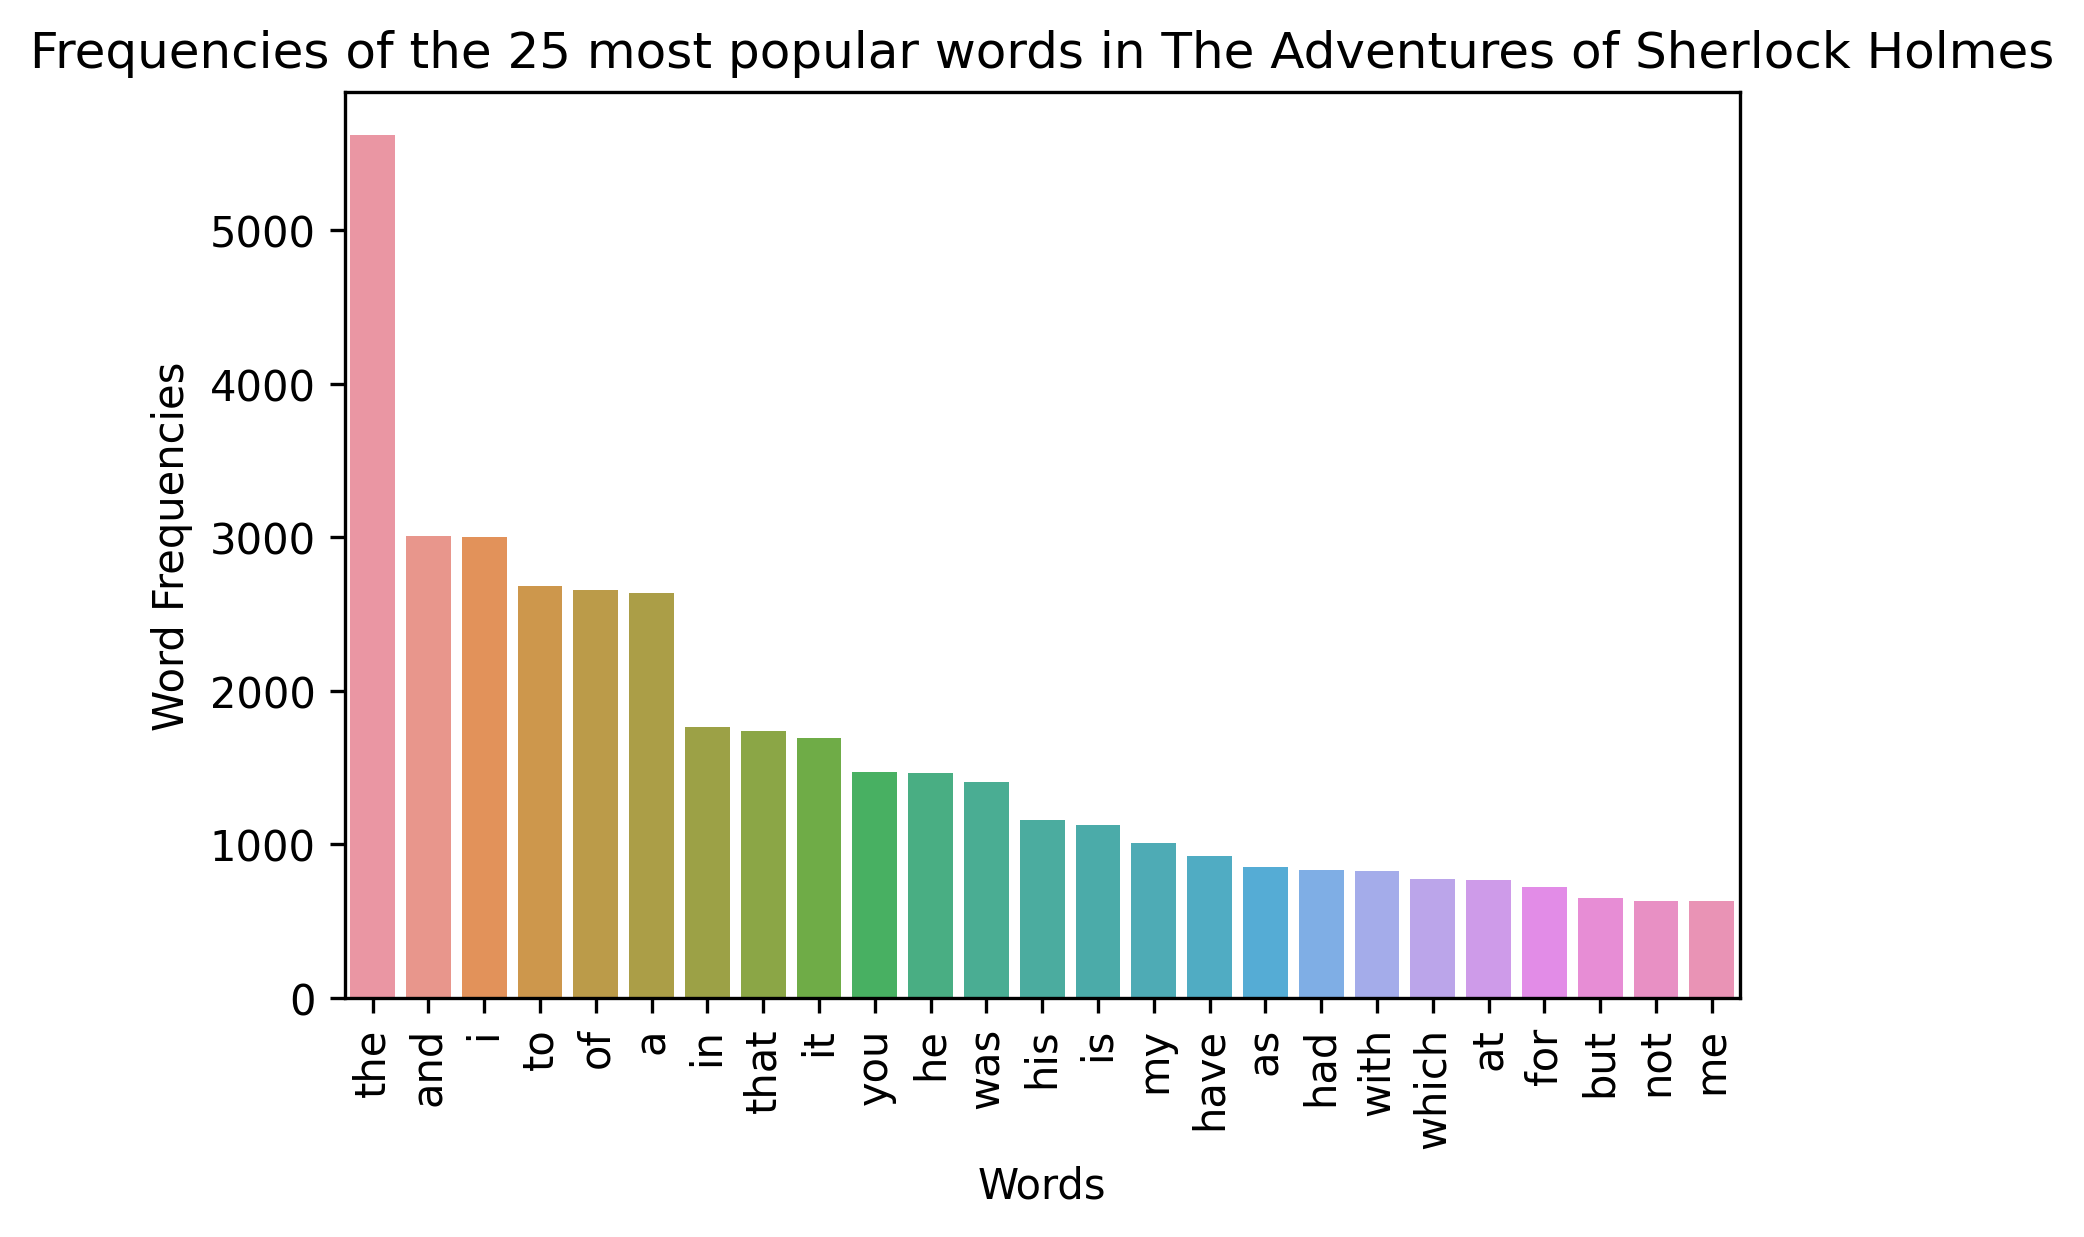

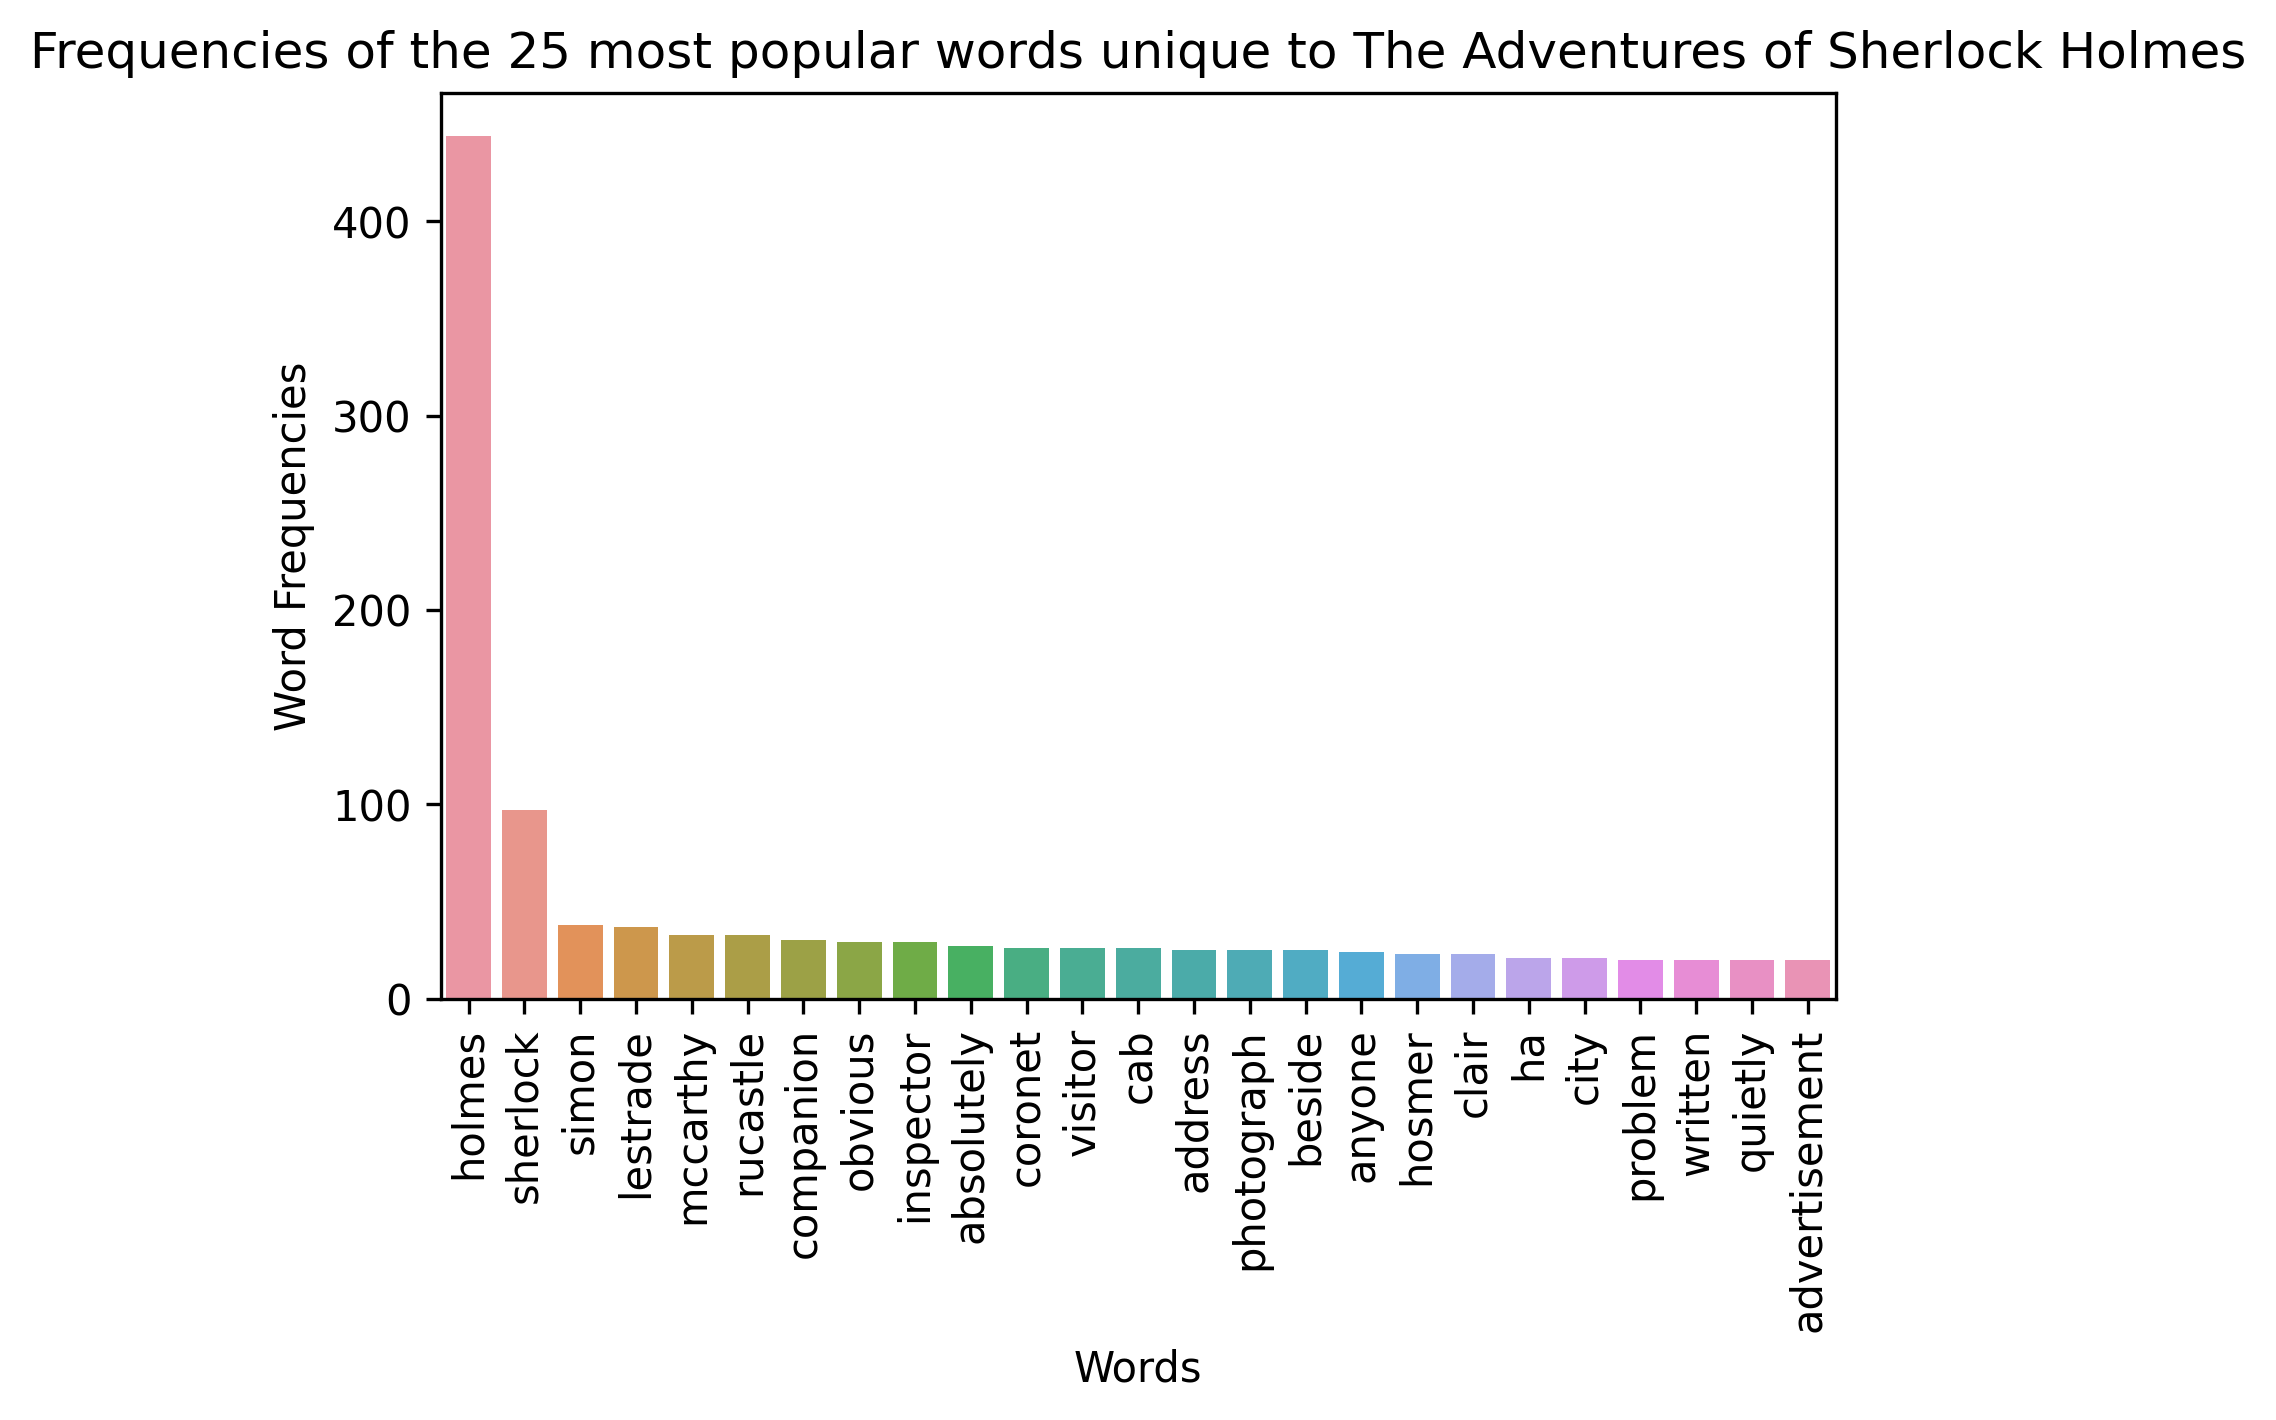

In [8]:
    # Create a dataframe with our second book and plot it
    plt.clf()
    olddict = bookdicts[books[2][0]]
    df = pd.DataFrame({
        "Words": list(olddict.keys())[:25],
        "Word Frequencies": list(olddict.values())[:25],
    })
    plt.xticks(rotation = 90)
    plt.title("Frequencies of the 25 most popular words in {}".format(books[2][0]))
    sns.barplot(data=df,x="Words",y="Word Frequencies")
    plt.show()
    
    # Go through and create a dictionairy of words unique to Huckleberry Finn
    uniquewords = {}
    for word in bookdicts[books[2][0]]:
        if (word not in bookdicts[books[1][0]] and word not in bookdicts[books[0][0]]):
            uniquewords[word] = bookdicts[books[2][0]][word]
            
    # Create a dataframe with our second book and plot it
    plt.clf()
    df = pd.DataFrame({
        "Words": list(uniquewords.keys())[:25],
        "Word Frequencies": list(uniquewords.values())[:25],
    })
    plt.xticks(rotation = 90)
    plt.title("Frequencies of the 25 most popular words unique to {}".format(books[2][0]))
    sns.barplot(data=df,x="Words",y="Word Frequencies")
    plt.show()

2. As we can see above, the most common words used by Sir Arthur Conan Doyle are pretty similar to the ones used by Mark Twain. Words unique to The Adventures of Sherlock Holmes primarily include names like "Sherlock", "Holmes", "Simon" and "Lestrade". Common words such as "the", "and", "i" and "to" appear in works by both authors, despite them being wholly unrelated.
3. We can see Sir Arthur Conan Doyle uses words such as "companion", "obvious" and "inspector". These words are not used at all by Mark Twain, so they would be examples of words that one author prefers over the other.